<a href="https://colab.research.google.com/github/hayaboy/ADP_Practical_Exam/blob/main/ESD%ED%85%8C%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import stats

def esd_test(data, alpha=0.05, max_outliers=None):
    if max_outliers is None:
        max_outliers = int(np.ceil(len(data) / 2))

    data = np.array(data)
    outliers = []
    n = len(data)

    for i in range(max_outliers):
        mean = np.mean(data)
        std = np.std(data, ddof=1)
        R = np.abs(data - mean) / std
        max_R_index = np.argmax(R)
        max_R = R[max_R_index]

        lambda_critical = stats.t.ppf(1 - alpha / (2 * (n - i)), n - i - 1)
        lambda_critical = ((n - i) * lambda_critical) / np.sqrt((n - i - 1 + lambda_critical**2) * (n - i + 1))

        if max_R > lambda_critical:
            outliers.append(data[max_R_index])
            data = np.delete(data, max_R_index)
        else:
            break

    return outliers

# 예제 데이터
data = [10, 12, 12, 13, 12, 14, 13, 16, 12, 18, 19, 20, 22, 21, 20, 19, 23, 100]

# ESD 테스트 실행
outliers = esd_test(data)
print("Detected outliers:", outliers)

Detected outliers: [100]


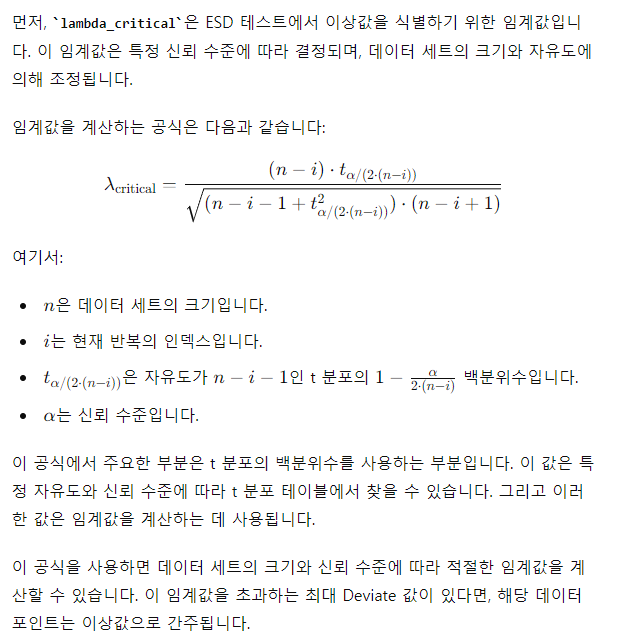